In [9]:
# Load modules
from __future__ import print_function
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa

In [17]:
# Function to plot signal, ACF and PACF
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    # Plot graphs
    xt.plot()
    
    plot_acf(xt, lags=50)
    plot_pacf(xt, lags=50)
    plt.tight_layout()
    return None

In [18]:
# Number of samples
n = 600

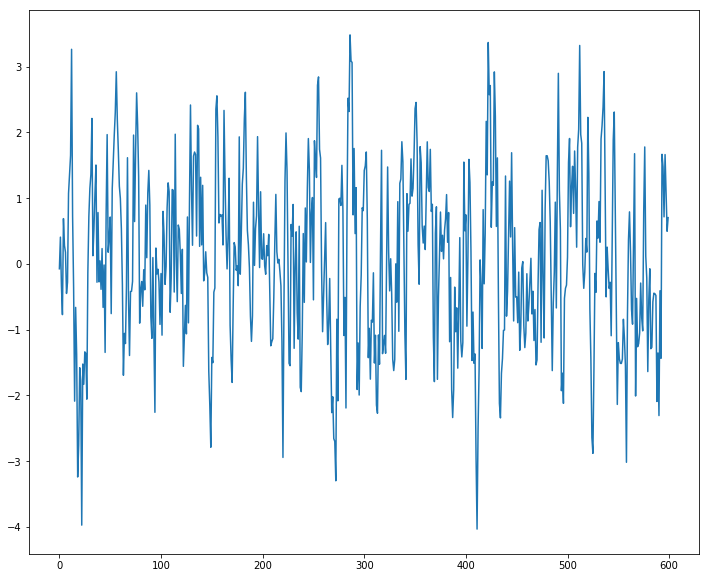

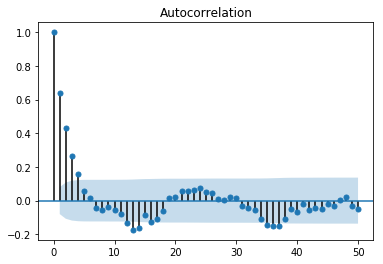

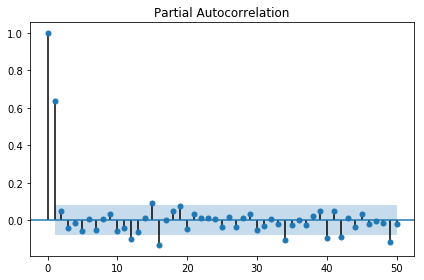

In [35]:
# Generate AR(1) dataset
ar = np.r_[1, -0.6]
ma = np.r_[1, 0]
ar1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1_data)

In [13]:
ar1_data

array([ 1.53111300e-01, -9.66804710e-01, -7.26110887e-01, -9.21864879e-02,
        8.07289009e-01,  1.35305784e+00, -8.44397841e-01, -1.51106095e+00,
        7.57148869e-01, -8.16264379e-01,  1.54973166e+00,  1.31368978e+00,
       -1.29023744e-01,  1.49149639e+00,  1.76405465e+00,  1.58012700e+00,
       -5.63127624e-01,  7.40176139e-02,  1.31604450e+00,  1.64274954e+00,
        1.84087833e+00,  7.44662569e-01,  2.99981913e-01, -9.96913182e-01,
       -9.55437533e-01, -1.17784305e-02, -7.44589061e-01, -5.44377263e-01,
        2.64827288e-01,  1.72919820e-01, -1.72912974e+00,  3.10390140e-01,
        7.80087983e-01,  1.81016066e+00,  4.35925547e-01, -1.38296349e+00,
       -6.96841892e-01,  1.10612441e-02,  7.90314380e-01,  1.56498099e-01,
       -8.92662719e-01, -7.62120620e-01,  6.56766231e-01,  4.99659293e-01,
        1.00574895e+00,  7.86311554e-01,  1.05233224e+00, -5.46390100e-02,
       -9.48620563e-01,  9.89990816e-01,  2.14480478e+00,  3.09964675e-01,
       -2.93587172e-01,  

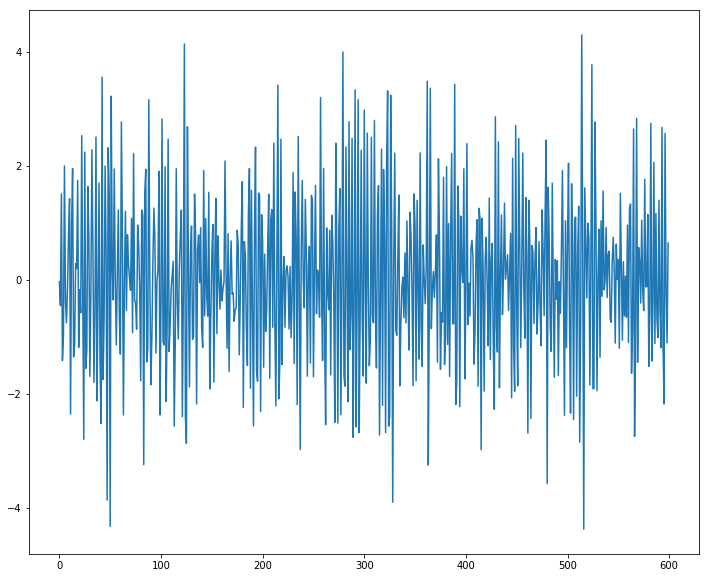

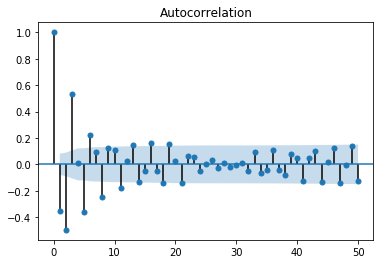

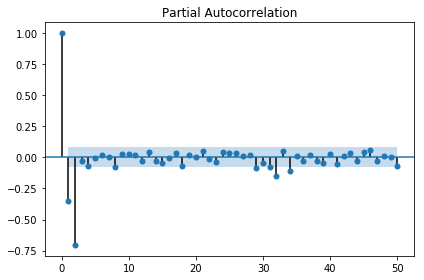

In [20]:
# Generate AR(2) dataset
ar = np.r_[1, 0.6, 0.7]
ma = np.r_[1, 0]
ar2_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar2_data)

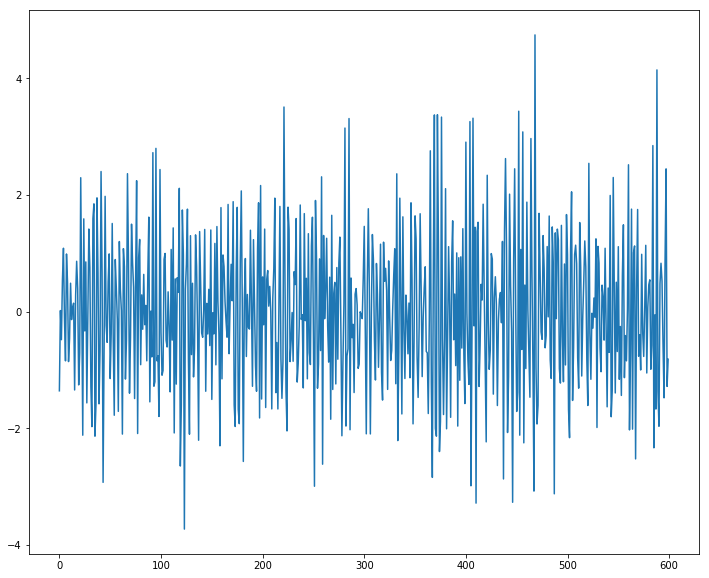

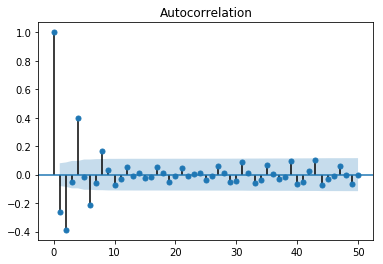

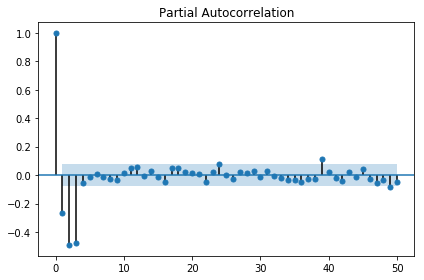

In [21]:
# Generate AR(3) dataset
ar = np.r_[1, 0.6, 0.7, 0.5]
ma = np.r_[1, 0]
ar3_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar3_data)

In [26]:
ar1model = smtsa.ARMA(ar1_data.tolist(), order=(1, 0))
ar1=ar1model.fit(maxlag=30, method='mle', trend='nc')
ar1.summary()

C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(1, 0)   Log Likelihood                -858.684
Method:                           mle   S.D. of innovations              1.012
Date:                Thu, 21 Jun 2018   AIC                           1721.368
Time:                        15:57:48   BIC                           1730.161
Sample:                             0   HQIC                          1724.791
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.2170      0.040      5.444      0.000       0.139       0.295
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            4.6092           +0.0000j            4.6092            0.0000
-----------------------------------------------------------------------------
"""

In [27]:
# Build MA(3) model
ar3 = smtsa.ARMA(ar3_data.tolist(), order=(3, 0)).fit(
    maxlag=30, method='mle', trend='nc')
ar3.summary()

C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(3, 0)   Log Likelihood                -847.808
Method:                           mle   S.D. of innovations              0.993
Date:                Thu, 21 Jun 2018   AIC                           1703.616
Time:                        16:37:33   BIC                           1721.203
Sample:                             0   HQIC                          1710.462
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.6370      0.036    -17.811      0.000      -0.707      -0.567
ar.L2.y       -0.6863      0.034    -20.130      0.000      -0.753      -0.619
ar.L3.y       -0.4837      0.036    -13.531      0.000      -0.554      -0.414
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0285           -1.1832j            1.1836           -0.2462
AR.2            0.0285           +1.1832j            1.1836            0.2462
AR.3           -1.4757           -0.0000j            1.4757           -0.5000
-----------------------------------------------------------------------------
"""